In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [7]:
#Some retina mode for high resolution plots
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [33]:
# Download CO2 data from NOAA
url = 'https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.csv'

names = 'year,month,decimal date,average,deseasonalized,ndays,sdev,unc'.split(',')

# no index
df = pd.read_csv(url, skiprows=72, names=names, index_col=False)

In [26]:
df

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
1960-10-01,1960,10,1960.7896,313.83,316.83,-1,-9.99,-0.99
1960-11-01,1960,11,1960.8743,315.00,316.88,-1,-9.99,-0.99
1960-12-01,1960,12,1960.9563,316.19,316.96,-1,-9.99,-0.99
1961-01-01,1961,1,1961.0411,316.89,316.86,-1,-9.99,-0.99
1961-02-01,1961,2,1961.1260,317.70,317.08,-1,-9.99,-0.99
...,...,...,...,...,...,...,...,...
2023-09-01,2023,9,2023.7083,418.51,421.96,18,0.30,0.14
2023-10-01,2023,10,2023.7917,418.82,422.12,27,0.47,0.17
2023-11-01,2023,11,2023.8750,420.46,422.43,21,0.91,0.38
2023-12-01,2023,12,2023.9583,421.86,422.56,20,0.70,0.30


In [36]:
#MAybe this was not required
df.index = pd.to_datetime(df[['year', 'month']].apply(lambda x: '{}-{}'.format(x[0], x[1]), axis=1))

C:\Users\parag\AppData\Local\Temp\ipykernel_14140\950155124.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.index = pd.to_datetime(df[['year', 'month']].apply(lambda x: '{}-{}'.format(x[0], x[1]), axis=1))


In [37]:
df

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
1960-10-01,1960,10,1960.7896,313.83,316.83,-1,-9.99,-0.99
1960-11-01,1960,11,1960.8743,315.00,316.88,-1,-9.99,-0.99
1960-12-01,1960,12,1960.9563,316.19,316.96,-1,-9.99,-0.99
1961-01-01,1961,1,1961.0411,316.89,316.86,-1,-9.99,-0.99
1961-02-01,1961,2,1961.1260,317.70,317.08,-1,-9.99,-0.99
...,...,...,...,...,...,...,...,...
2023-09-01,2023,9,2023.7083,418.51,421.96,18,0.30,0.14
2023-10-01,2023,10,2023.7917,418.82,422.12,27,0.47,0.17
2023-11-01,2023,11,2023.8750,420.46,422.43,21,0.91,0.38
2023-12-01,2023,12,2023.9583,421.86,422.56,20,0.70,0.30


Text(0, 0.5, '$CO_2$ level')

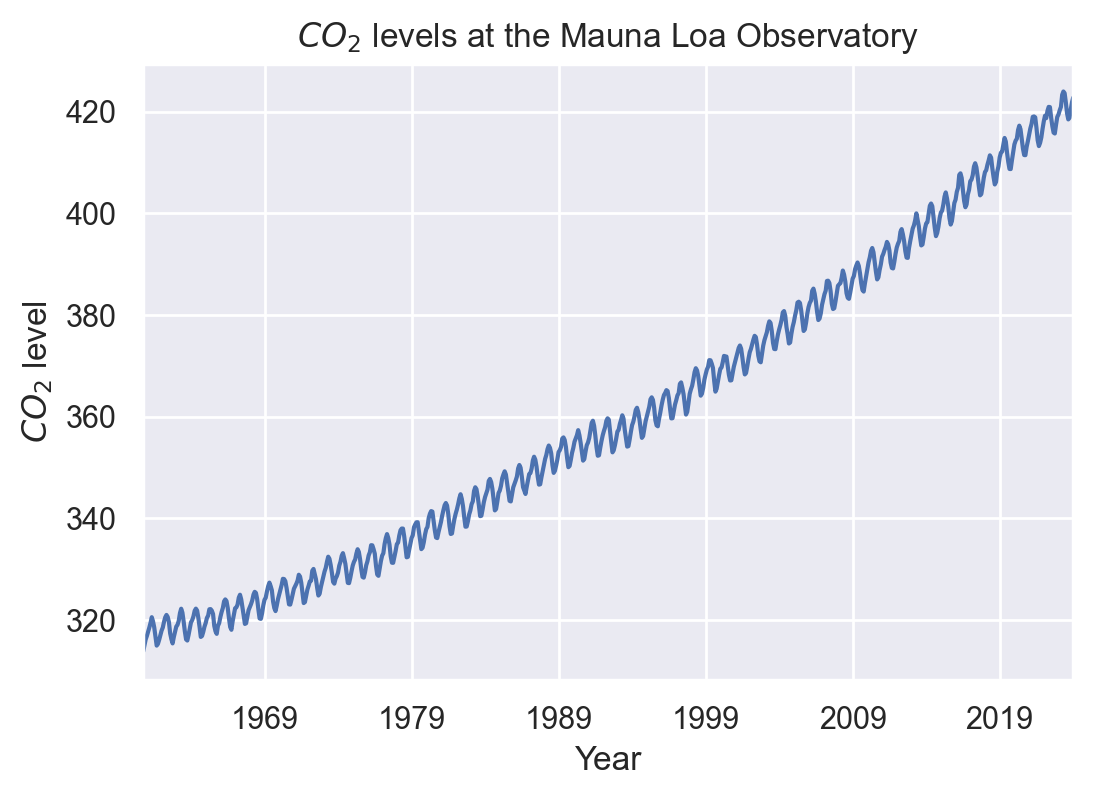

In [38]:
df.average.plot(figsize=(6,4), title="$CO_2$ levels at the Mauna Loa Observatory")
plt.xlabel("Year")
plt.ylabel("$CO_2$ level")

Running linear regression on the years won't be a good idea. Number of months from the starting of observations seems like a good idea.

In [45]:
#Create X and y
#X - Training data; y - labels
X = np.array(range(len(df)))
y = df.average.values

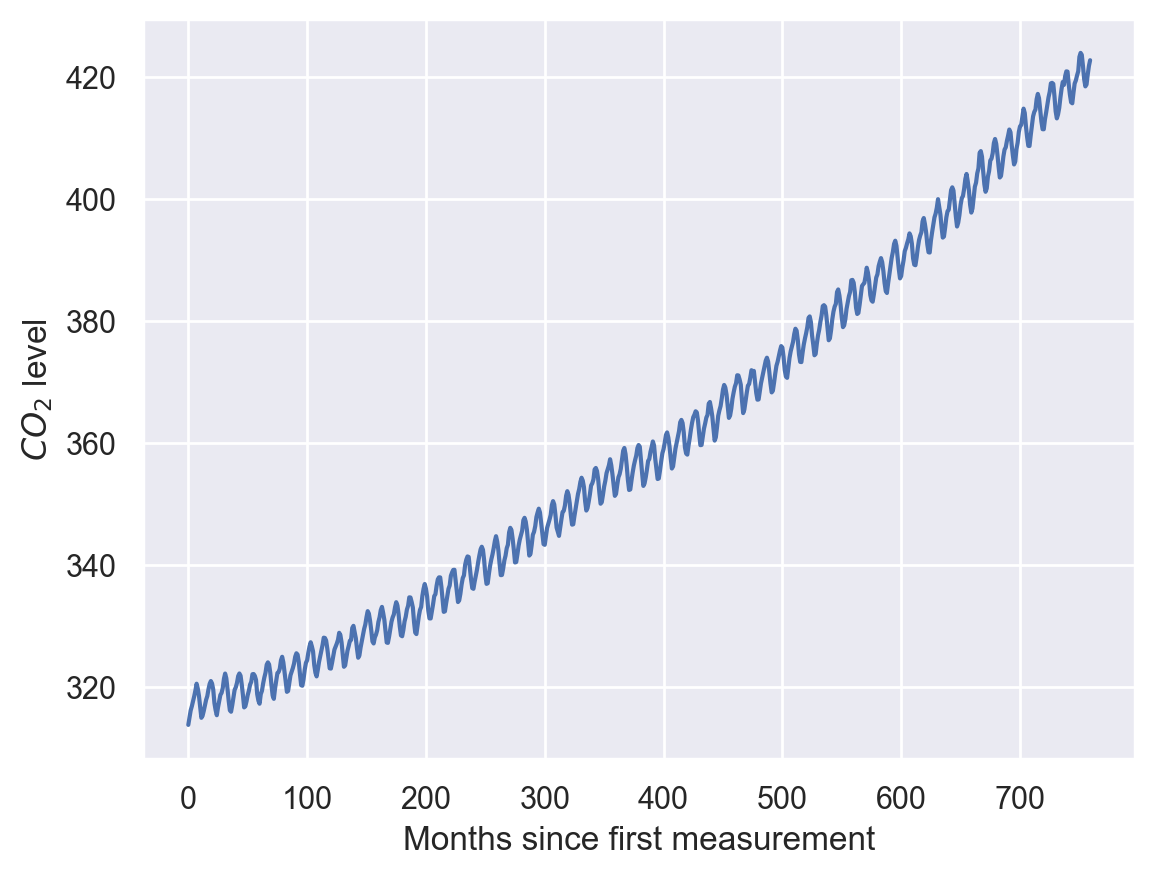

In [49]:
plt.plot(X,y)
plt.xlabel("Months since first measurement")
plt.ylabel("$CO_2$ level")
plt.show()

In [62]:
#Lets normalize X and y; would make the 

s1 = StandardScaler()
s2 = StandardScaler()

X_norm = s1.fit_transform(X.reshape(-1,1))
y_norm = s2.fit_transform(y.reshape(-1,1))

In [63]:
X_norm.mean(), X_norm.std()

(7.47939721852737e-17, 1.0)

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      